In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#%matplotlib inline

def cfun(x):
    if isinstance(x, str):        # isinstance(x, str) for python 3
        return x[1:].strip()
    else:
        return x

dKeys = ['Benzene','Lead','Manganese','MTBE Vol %','TAME Vol %','ETBE Vol %','DIPE Vol %','MTBE Wt %',
         'DIPE Wt %','ETBE Wt %','TAME Wt %','Methanol Vol %','Ethanol Vol %','T-Butanol Vol %',
         'Methanol Wt %','Ethanol Wt %','T-Butanol Wt %','Iso-propanol Wt %','n-Propanol Wt %',
         'sec-butanol Wt %','Iso-butanol Wt %','n-Butanol Wt %','tert-Pentanol Wt %','Aromatics',
         'Olefins','Saturates','Vapor Pressure']

con = dict.fromkeys(dKeys,cfun)

raw_data = pd.read_excel('NewYorkNJCT composition.xlsx', converters=con)

raw_data[dKeys]= raw_data[dKeys].apply(pd.to_numeric, errors = 'coerce', axis=0)

raw_data[dKeys] = raw_data[dKeys].replace({0:np.nan})



In [67]:
filData = raw_data.filter(items = ['SurveyName', 'Season', 'Date', 'Grade', 'Posted Octane', 'ResearchOctane',
                                   'MotorOctane', 'R+M/2', 'R+M/2.1','Vapor Pressure', 'APIGravity',
                                   'Specific Gravity','Aromatics','Saturates'])
df = filData.filter(items = ['Grade','Posted Octane', 'ResearchOctane','MotorOctane',
                             'R+M/2', 'R+M/2.1','Vapor Pressure', 'APIGravity', 'Specific Gravity',
                             'Aromatics','Saturates','Season'])

df1 = df[df['APIGravity'] != 0]

plotData = df1.filter(items=['Grade','R+M/2','Vapor Pressure', 'APIGravity','Aromatics','Saturates','Season'])




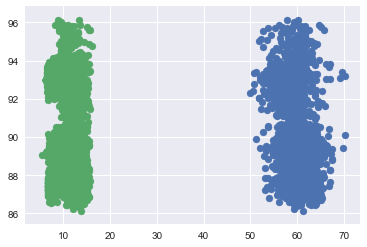

In [52]:

#sns.pairplot(plotData, hue='Grade', size=2.5)
plt.figure()
plt.scatter(plotData['APIGravity'],plotData['R+M/2'],cmap='rainbow')
plt.scatter(plotData['Vapor Pressure'],plotData['R+M/2'],cmap='rainbow')



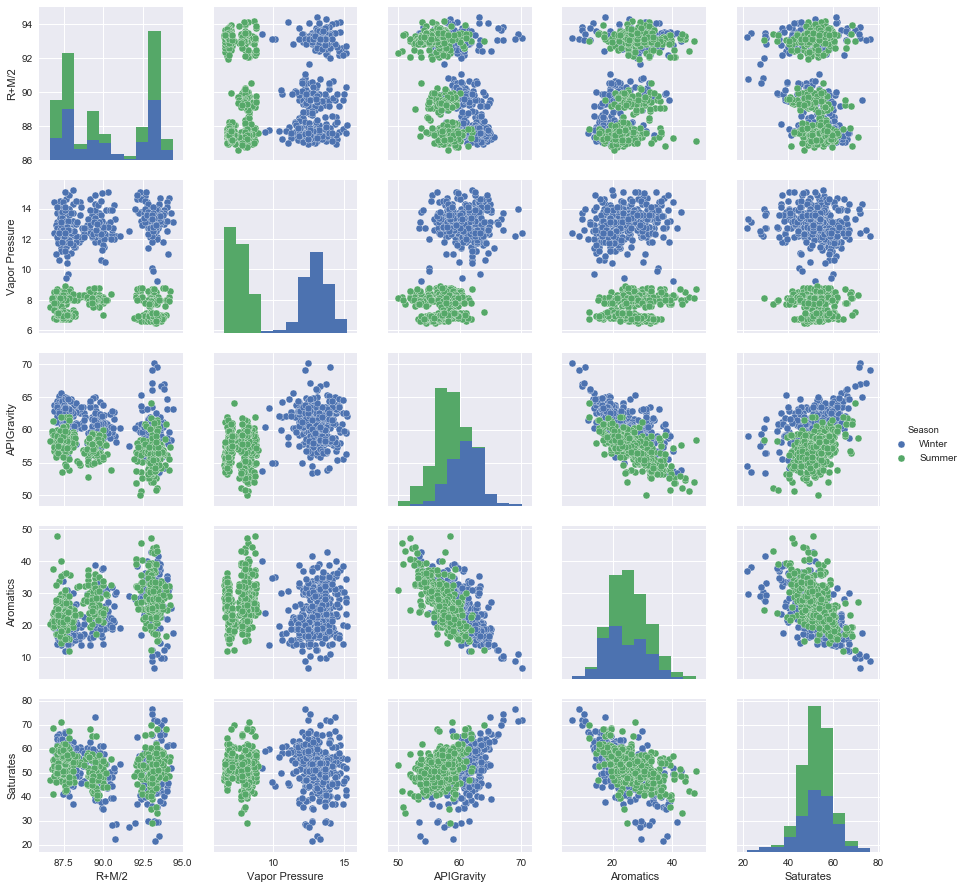

In [68]:
sns.pairplot(plotData.dropna(), hue='Season', size=2.5)

/Anaconda/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


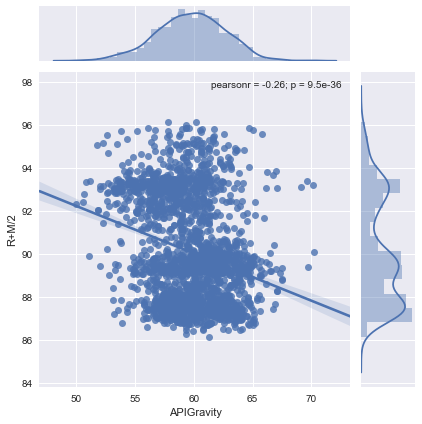

In [45]:
plt.figure(figsize=(8,10))
#sns.distplot(plotData['APIGravity'].dropna())
#sns.distplot(plotData['Vapor Pressure'].dropna())
#sns.distplot(plotData['R+M/2'].dropna())
sns.jointplot(plotData['APIGravity'].dropna(),plotData['R+M/2'].dropna(), kind='reg')


/Anaconda/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


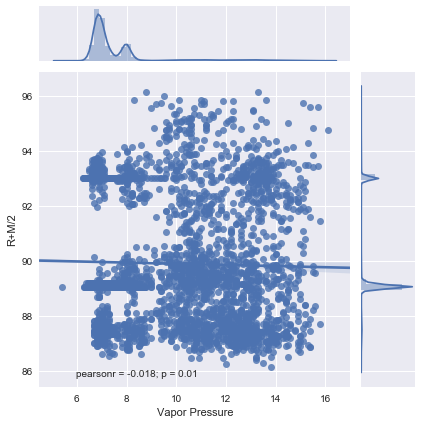

In [46]:
sns.jointplot(plotData['Vapor Pressure'].dropna(),plotData['R+M/2'].dropna(), kind='reg')

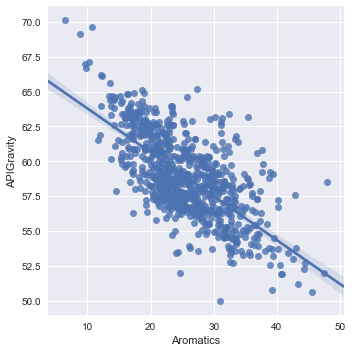

In [66]:
sns.lmplot('Aromatics','APIGravity',plotData.dropna())